In [3]:
#
# Steps in Applied Machine Learning & Data Science :
## 1. Load Library
## 2. Load Dataset to which Machine Learning Algorithm to be applied
###    Either a) load from a CSV file or b) load from a Database   
## 3. Summarisation of Data to understand dataset (Descriptive Statistics)
## 4. Visualisation of Data to understand dataset (Plots, Graphs etc.)
## 5. Data pre-processing & Data transformation (split into train-test datasets)
## 6. Application of a Machine Learning Algorithm to training dataset 
###   a) setup a ML algorithm and parameter settings
###   b) cross validation setup with training dataset
###   c) training & fitting Algorithm with training Dataset
###   d) evaluation of trained Algorithm (or Model) and result
###   e) saving the trained model for future prediction
## 7. Load the saved model and apply it to new dataset for prediction

In [2]:
# load necessary libraries

import time
import pandas as pd
import pickle as pk
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import sklearn_evaluation

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix
start_time = time.time()

# declare contants
kfold = 10
filename = 'iris.data.csv'    

In [6]:
# -------------------------------------------------------------------------
# Helper modules for Descriptive Statistics
# -------------------------------------------------------------------------    
def get_redundant_pairs(df):
        pairs_to_drop = set()
        cols = df.columns
        for i in range(0, df.shape[1]):
            for j in range(0, i+1):
                pairs_to_drop.add((cols[i], cols[j]))
        return pairs_to_drop

def get_top_abs_correlations(df, n=5): 
        au_corr = df.corr().unstack()
        labels_to_drop = get_redundant_pairs(df)
        au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
        return au_corr[0:n]

def corrank(X):
        import itertools
        df = pd.DataFrame([[(i,j), 
                   X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],
                   columns=['pairs','corr'])
        print(df.sort_values(by='corr',ascending=False))
        print()

In [7]:
# -------------------------------------------------------------------------    
# load dataset
# ------------------------------------------------------------------------- 
def load_dataset(filename):
        col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']
        
        dataset = pd.read_csv(filename, sep = ',', names = col_names)
        
        print(dataset.shape);    print(dataset.head(5));    print(dataset.columns);
        
        feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
        target = 'Species'
        
        return feature_names, target, dataset

# execute the function
feature_names, target, dataset = load_dataset(filename)    

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')


In [8]:
# -------------------------------------------------------------------------    
# find missing values in dataset if exists
# -------------------------------------------------------------------------
def find_missing_value(feature_names, target, dataset):
        # Count Number of Missing Value on Each Column    
        print('\nCount Number of Missing Value on Each Column: ')        
        print(dataset.isnull().sum(axis=0))

# execute the function
find_missing_value(feature_names, target, dataset)        


Count Number of Missing Value on Each Column: 
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64


In [9]:
# -------------------------------------------------------------------------
# descriptive statistics and correlation matrix
# -------------------------------------------------------------------------    
def data_descriptiveStats(feature_names, target, dataset):
        # Count Number of Missing Value on Each Column    
        print(); print('Count Number of Missing Value on Each Column: ')        
        print(); print(dataset[feature_names].isnull().sum(axis=0))
        print(); print(dataset[target].isnull().sum(axis=0))    
    
        # Get Information on the feature variables
        print(); print('Get Information on the feature variables: ')            
        print(); print(dataset[feature_names].info())
        print(); print(dataset[feature_names].describe())
    
        # correlation
        pd.set_option('precision', 2)
        print(); print(dataset[feature_names].corr())    
    
        # Ranking of Correlation Coefficients among Variable Pairs
        print(); print("Ranking of Correlation Coefficients:")    
        corrank(dataset[feature_names])

        # Print Highly Correlated Variables
        print(); print("Highly correlated variables (Absolute Correlations):")
        print(); print(get_top_abs_correlations(dataset[feature_names], 8))
    
        # Get Information on the target    
        print(); print(dataset[target].describe())    
        print(); print(dataset.groupby(target).size())    

data_descriptiveStats(feature_names, target, dataset)


Count Number of Missing Value on Each Column: 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

0

Get Information on the feature variables: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.


BOX plot of each numerical features


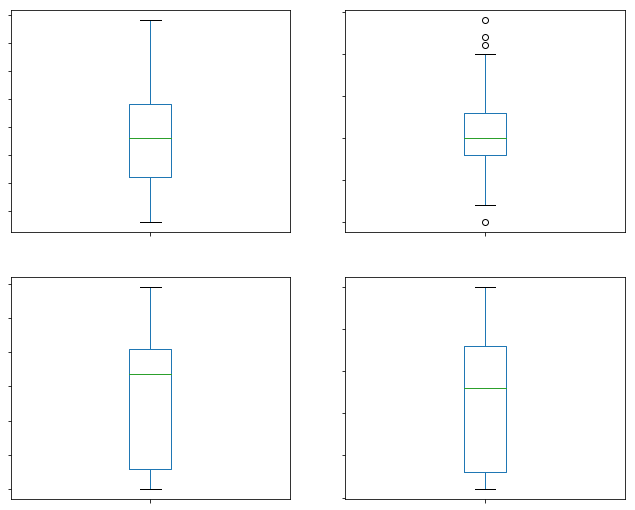


Histogram of each Numerical Feature


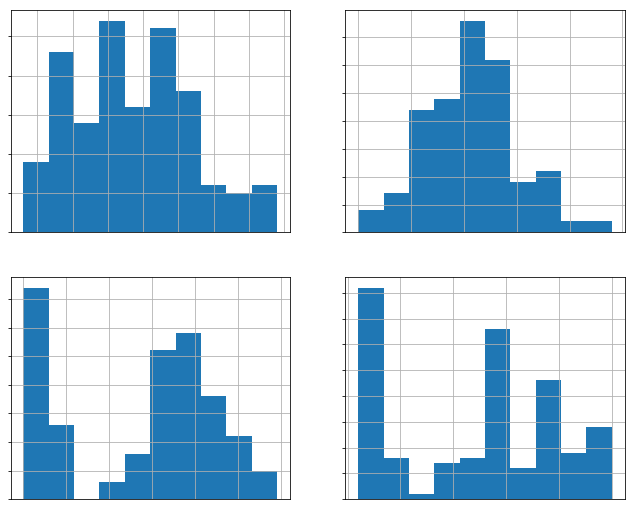


Correlation Matrix of All Numerical Features


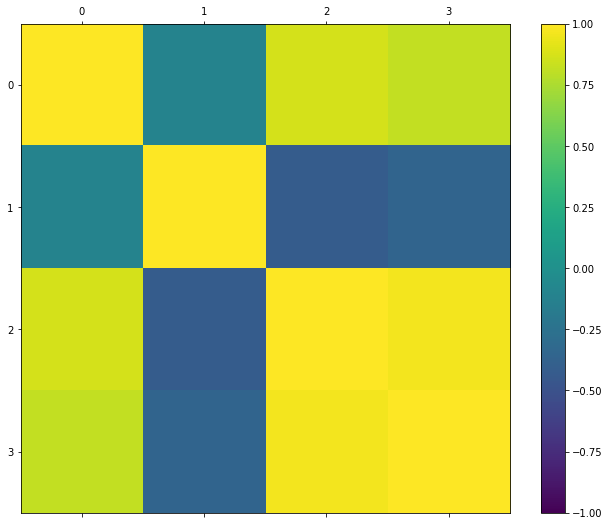


Correlation plot of Numerical features
              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.11          0.87         0.82
sepal_width          -0.11         1.00         -0.42        -0.36
petal_length          0.87        -0.42          1.00         0.96
petal_width           0.82        -0.36          0.96         1.00


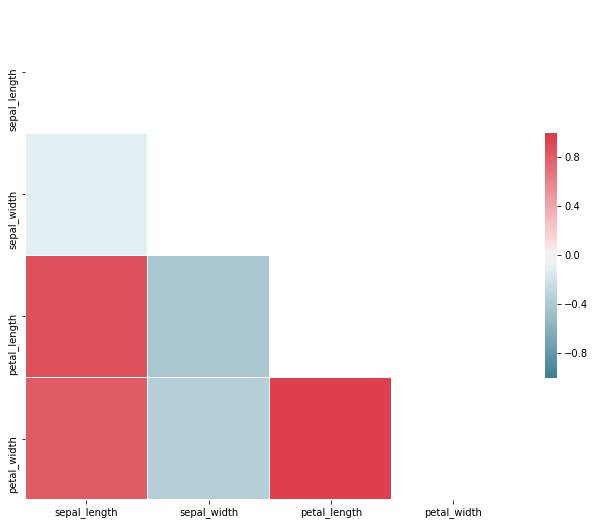


Scatter Matrix Plot


/Users/nilimesh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


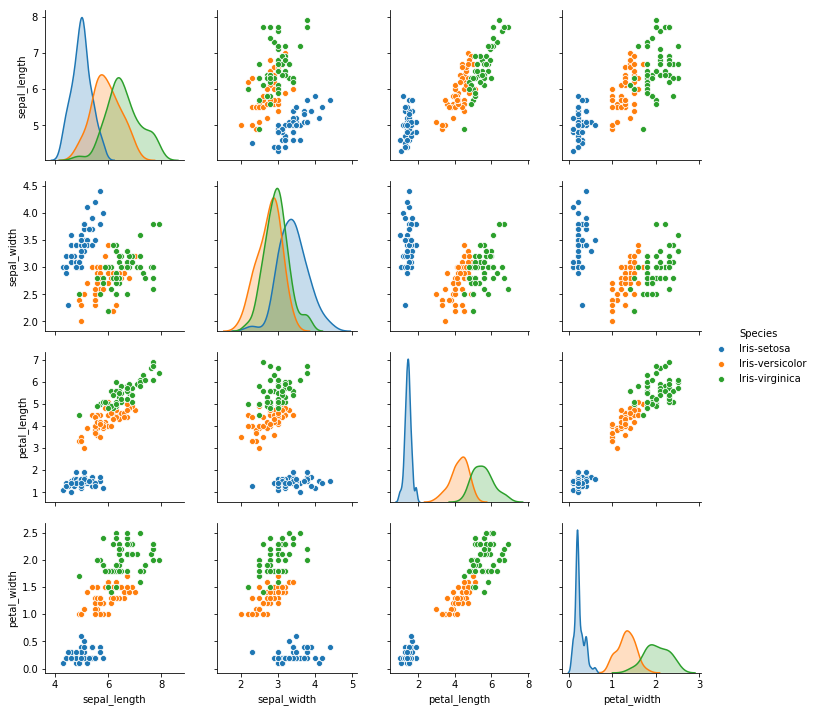


PIE Chart of for Target: 


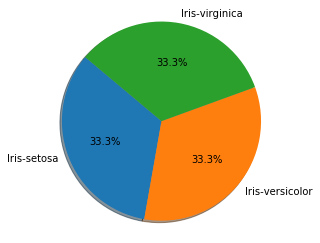

In [10]:
# -------------------------------------------------------------------------
# data visualisation and correlation graph
# -------------------------------------------------------------------------
def data_visualization(feature_names, target, dataset):
        # BOX plots USING box and whisker plots
        i = 1
        print(); print('BOX plot of each numerical features')
        plt.figure(figsize=(11,9))     
        for col in feature_names:
            plt.subplot(2,2,i)
            plt.axis('on')
            plt.tick_params(axis='both', left=True, top=False, right=False, bottom=True, 
                            labelleft=False, labeltop=False, labelright=False, labelbottom=False)
            dataset[col].plot(kind='box', subplots=True, sharex=False, sharey=False)
            i += 1
        plt.show()    
    
        # USING histograms
        j = 1
        print(); print('Histogram of each Numerical Feature')
        plt.figure(figsize=(11,9))     
        for col in feature_names:
            plt.subplot(2,2,j)
            plt.axis('on')
            plt.tick_params(axis='both', left=True, top=False, right=False, bottom=False, 
                            labelleft=False, labeltop=False, labelright=False, labelbottom=False)
            dataset[col].hist()
            j += 1
        plt.show()

        # correlation matrix
        print(); print('Correlation Matrix of All Numerical Features')   
        fig = plt.figure(figsize=(11,9))
        ax = fig.add_subplot(111)
        cax = ax.matshow(dataset[feature_names].corr(), vmin=-1, vmax=1, interpolation='none')
        fig.colorbar(cax)
        ticks = np.arange(0,4,1)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        plt.show()

        # Correlation Plot using seaborn
        print(); print("Correlation plot of Numerical features")
        # Compute the correlation matrix
        corr = dataset[feature_names].corr()
        print(corr)
        # Generate a mask for the upper triangle
        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(11, 9))
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin= -1.0, center=0, square=True, 
                    linewidths=.5, cbar_kws={"shrink": .5})
        plt.show()    
    
        # PairPlot using seaborn
        print(); print('Scatter Matrix Plot')
        sns.pairplot(dataset, hue = 'Species')
        plt.show()
    
        # Pie chart for Categorical Variables
        print(); print('PIE Chart of for Target: ')
        plt.figure(figsize=(11,9)) 
        i = 1
        for colName in [target]:
            labels = []; sizes = [];
            df = dataset.groupby(colName).size()
            for key in df.keys():
                labels.append(key)
                sizes.append(df[key])
            # Plot PIE Chart with %
            plt.subplot(2,2,i)
            plt.axis('on')
            plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, 
                            labelleft=True, labeltop=True, labelright=False, labelbottom=False)        
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
            plt.axis('equal')
            i += 1; plt.savefig('Piefig.pdf', format='pdf')
        plt.show()    

data_visualization(feature_names, target, dataset)

In [11]:
# -------------------------------------------------------------------------
# data split to train and test datasets
# -------------------------------------------------------------------------    
def data_split(feature_names, target, dataset):
        # Data Transform - Split train : test datasets
        X_train, X_test, y_train, y_test = train_test_split(dataset.loc[:, feature_names], 
                                                            dataset.loc[:, target], test_size=0.33)
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = data_split(feature_names, target, dataset)

# -------------------------------------------------------------------------
# model training
# -------------------------------------------------------------------------    
def training_model(X_train, y_train):
        model = DecisionTreeClassifier(criterion='gini', splitter='best', 
                                       max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                       max_features=None, random_state=None, 
                                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                       min_impurity_split=None, class_weight=None, 
                                       presort=False)
        # parameters
        parameters = {'max_depth'     : [4,6,8,10,12],
                      'criterion'     : ['gini', 'entropy'],
                      'splitter'      : ['best', 'random'],
                      'min_weight_fraction_leaf'  : [0.0,0.1,0.2,0.3],
                      'random_state' : [7,23,42,78,142],
                      'min_impurity_decrease' : [0.0,0.05,0.1,0.2]
                      # Add more parameters here for tuning
                      }
        grid = GridSearchCV(estimator=model, param_grid = parameters, cv = kfold, 
                            verbose = 1, n_jobs = -1, refit = True)
        grid.fit(X_train, y_train)

        # Results from Grid Search
        print("\n========================================================")
        print(" Results from Grid Search " )
        print("========================================================")    
        print("\n The best estimator across ALL searched params:\n",
              grid.best_estimator_)
        print("\n The best score across ALL searched params:\n",
              grid.best_score_)
        print("\n The best parameters across ALL searched params:\n",
              grid.best_params_)
        print("\n ========================================================")

        return(grid.best_estimator_)

model = training_model(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Done 2412 tasks      | elapsed:    1.5s



 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='random')

 The best score across ALL searched params:
 0.96

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'random'}



[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:    8.7s finished


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished



Cross Validation results:  [1.         0.81818182 1.         0.90909091 1.         1.
 0.9        1.         1.         1.        ]
CV Mean Accuracy: 0.962727 (Std: 0.061180)


{'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 7, 'splitter': 'random'}



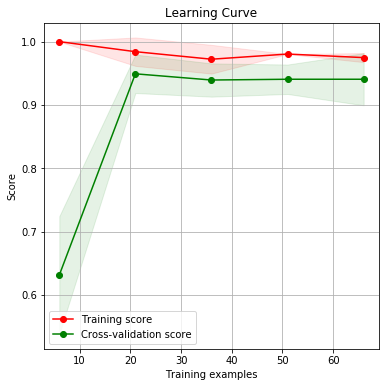

In [12]:
# ----------------------------------------------
# cross validation using the best fit model
# ----------------------------------------------
def cross_validatin_and_fitting(model, X_train, y_train):
        cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy', 
                                 n_jobs = -1, verbose = 1)
        # Cross Validation Results
        print()
        print("Cross Validation results: ", cv_results)
        prt_string = "CV Mean Accuracy: %f (Std: %f)"% (cv_results.mean(), cv_results.std())
        print(prt_string)
        
        # Final fitting of the Model
        model.fit(X_train, y_train)
        
        print(); print('========================================================')
        print(); print(model.get_params(deep = True))
        print(); print('========================================================')        
        
        # plot learning Curves
        skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
        plt.show()
        
        return model
model = cross_validatin_and_fitting(model, X_train, y_train)


Evaluation of the trained model: 

Accuracy :  0.98

Kappa Score :  0.9690018598884067

Confusion Matrix :
 [[15  0  0]
 [ 0 22  1]
 [ 0  0 12]]

Classification Report :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.96      0.98        23
 Iris-virginica       0.92      1.00      0.96        12

    avg / total       0.98      0.98      0.98        50



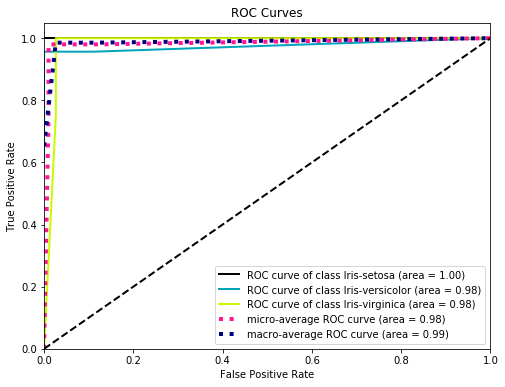

/Users/nilimesh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


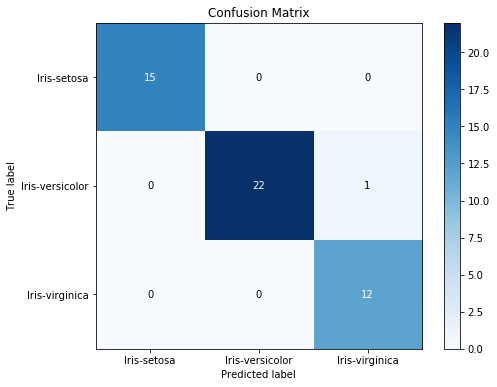

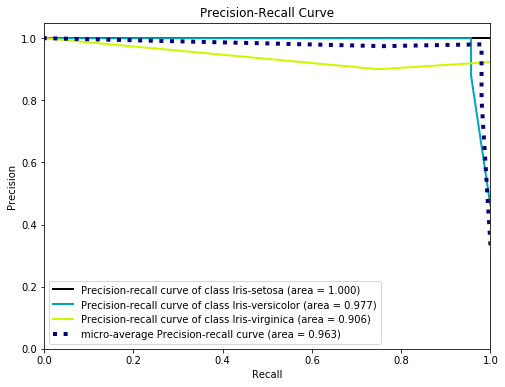

In [13]:
# -----------------------------------------------
# Evaluate the skill of the Trained model
# -----------------------------------------------
def evaluate_model(model, X_test, y_test):
        pred_Class          = model.predict(X_test)
        acc                 = accuracy_score(y_test, pred_Class)
        classReport         = classification_report(y_test, pred_Class)
        confMatrix          = confusion_matrix(y_test, pred_Class) 
        kappa_score         = cohen_kappa_score(y_test, pred_Class)         
        
        print(); print('Evaluation of the trained model: ')
        print(); print('Accuracy : ', acc)
        print(); print('Kappa Score : ', kappa_score)
        print(); print('Confusion Matrix :\n', confMatrix)
        print(); print('Classification Report :\n',classReport)

        pred_proba = model.predict_proba(X_test)
        
        # Add more plots here using scikit-plot
        # ROC curves
        skplt.metrics.plot_roc(y_test,pred_proba,figsize=(8,6)); plt.show()

        # Confusion matrix
        skplt.metrics.plot_confusion_matrix(y_test,pred_Class,figsize=(8,6)); plt.show()        

        # precision recall curve
        skplt.metrics.plot_precision_recall(y_test, pred_proba, 
                title='Precision-Recall Curve', plot_micro=True, 
                classes_to_plot=None, ax=None, figsize=(8,6), 
                cmap='nipy_spectral', title_fontsize='large', 
                text_fontsize='medium'); plt.show()        
        
        # Add more ... ... ...
        
        return model

model = evaluate_model(model, X_test, y_test)


Feature Importance/Rank Analysis: 
1. feature 2 petal_length (0.551261)
2. feature 3 petal_width (0.446028)
3. feature 0 sepal_length (0.002711)
4. feature 1 sepal_width (0.000000)


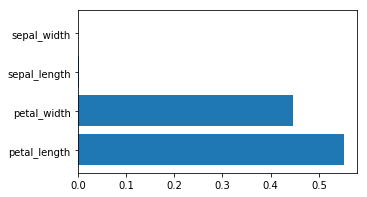

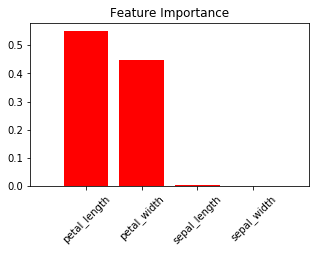

In [14]:
# ------------------------------------------------
# Feature Rank Analysis
# -------------------------------------------------
def featureRank_Analysis(model, dataset, cols):
        print()
        print("Feature Importance/Rank Analysis: ")
        X = dataset.loc[:, cols]; X_cols = X.columns.values
    
        features_imp = model.feature_importances_    
    
        indices = np.argsort(features_imp)[::-1]
        df = {}
        for f in range(X.shape[1]):
            print("%d. feature %d %s (%f)" % (f + 1, indices[f], X_cols[indices[f]], 
                                              features_imp[indices[f]]))
            df[f] = [f + 1, indices[f], X_cols[indices[f]], features_imp[indices[f]]]

        df1 = pd.DataFrame.from_dict(df, orient = 'index')
        df1.columns = ['feature_Rank', 'feature_Index', 'feature_Name', 'feature_importance']
        df1.to_csv("FeatureImportanceRank.csv", index = False)

        # this creates a figure 5 inch wide, 3 inch high
        plt.figure(figsize=(5,3)) 
        plt.barh(df1['feature_Rank'], df1['feature_importance'], tick_label = df1['feature_Name'])
        plt.savefig('Featurefig.pdf', format='pdf')
        plt.show()   

        skplt.estimators.plot_feature_importances(model, feature_names=cols,
                                                  x_tick_rotation = 45, figsize=(5,3))
        plt.show()
        
featureRank_Analysis(model, dataset, feature_names)

In [15]:
# ------------------
# save the model
# ------------------
def save_model(model):
        with open('DSC_Recipe_1_model.pickle', 'wb') as f: 
            pk.dump(model, f)

save_model(model) 

In [16]:
# ------------------------------------------------
# Load the model from disk and make predictions
# ------------------------------------------------
def final_prediction(feature_names, filename):
        # load model
        f = open('DSC_Recipe_1_model.pickle', 'rb')
        model = pk.load(f); f.close();
        
        # load dataset
        col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Species']
        dataset = pd.read_csv(filename, sep = ',', names = col_names)
        
        # final prediction and results
        predicted_species     = model.predict(dataset[feature_names])
        dataset['predicted_species'] = predicted_species
        dataset.to_csv('FinalResult.csv', index = False)

final_prediction(feature_names, filename)        

In [17]:
print()
print("Required Time %s seconds: " % (time.time() - start_time))


Required Time 60.51000618934631 seconds: 
